In [1]:
import tensorflow as tf

gpus = tf.config.list_physical_devices('GPU')

for gpu in gpus:

    tf.config.experimental.set_memory_growth(gpu, True)


In [2]:
for gpu in gpus:

    print(gpu)

PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')


In [3]:
import tensorflow_datasets as tfds

import matplotlib.pyplot  as  plt

In [4]:
ds_train=tfds.load('fashion_mnist',split='train')

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/60000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/fashion_mnist/incomplete.MY4QDZ_3.0.1/fashion_mnist-train.tfrecord*...:   …

Generating test examples...:   0%|          | 0/10000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/fashion_mnist/incomplete.MY4QDZ_3.0.1/fashion_mnist-test.tfrecord*...:   0…

Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.


In [5]:
import numpy as np

train_iter=ds_train.as_numpy_iterator()

In [6]:
train_iter.next()['image'].shape

(28, 28, 1)

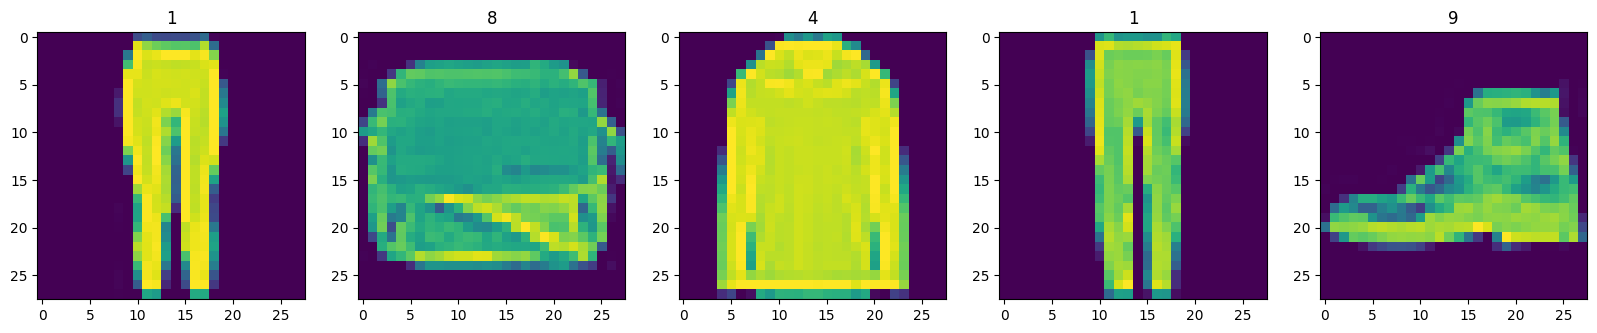

In [7]:
fig,ax=plt.subplots(ncols=5,figsize=(20,20))

for idx in range(5):

    data=train_iter.next()

    img=data['image']

    label=data['label']

    ax[idx].imshow(img.squeeze())

    ax[idx].title.set_text(label)

In [8]:
def scale_images(data):

  image=data['image']

  image = tf.cast(image, tf.float32)

  return image/255.0


In [9]:
ds_train=tfds.load('fashion_mnist',split='train')

ds_train=ds_train.map(scale_images)

ds_train=ds_train.cache()

ds_train=ds_train.shuffle(60000)

ds_train=ds_train.batch(128)

ds_train=ds_train.prefetch(64)

In [10]:
ds_train.as_numpy_iterator().next().shape

(128, 28, 28, 1)

In [11]:
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,LeakyReLU,Dropout,UpSampling2D,Reshape,Conv2DTranspose,BatchNormalization




In [12]:
def build_generator():

    model = Sequential()



    # Takes in random values and reshapes it to 7x7x128

    # Beginnings of a generated image

    model.add(Dense(7*7*128, input_dim=128))

    model.add(LeakyReLU(0.2))

    model.add(Reshape((7,7,128)))



    # Upsampling block 1

    model.add(UpSampling2D())

    model.add(Conv2D(128, 5, padding='same'))

    model.add(LeakyReLU(0.2))



    # Upsampling block 2

    model.add(UpSampling2D())

    model.add(Conv2D(128, 5, padding='same'))

    model.add(LeakyReLU(0.2))



    # Convolutional block 1

    model.add(Conv2D(128, 4, padding='same'))

    model.add(LeakyReLU(0.2))



    # Convolutional block 2

    model.add(Conv2D(128, 4, padding='same'))

    model.add(LeakyReLU(0.2))



    # Conv layer to get to one channel

    model.add(Conv2D(1, 4, padding='same', activation='sigmoid'))



    return model

In [13]:
gen=build_generator()

gen.summary()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 6272)           │       809,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d (UpSampling2D)    │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 14, 14, 128)    │       409,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_1 (UpSampling2D)  │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 28, 28, 128)    │       409,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_3 (LeakyReLU)       │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 128)    │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_4 (LeakyReLU)       │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 28, 28, 1)      │         2,049 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,155,137 (8.22 MB)

 Trainable params: 2,155,137 (8.22 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
img=gen.predict(np.random.randn(4,128,1))

img.shape

I0000 00:00:1728712969.196728     101 service.cc:145] XLA service 0x7f4864008aa0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1728712969.196783     101 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


I0000 00:00:1728712970.494151     101 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


(4, 28, 28, 1)

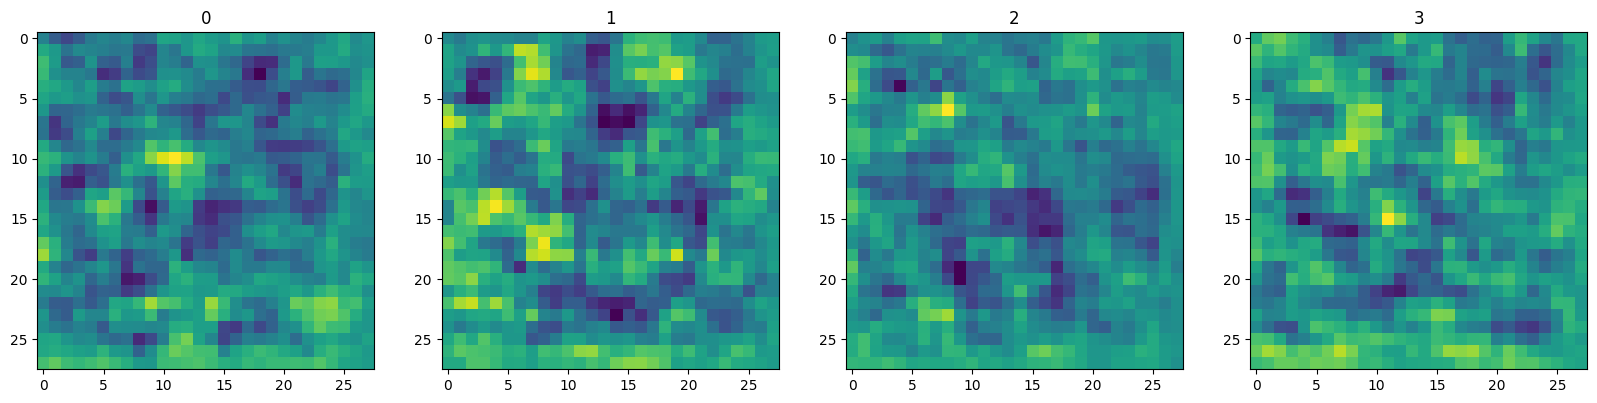

In [15]:


fig,ax=plt.subplots(ncols=4,figsize=(20,20))

for idx,img in enumerate(img):

    ax[idx].imshow(img)

    ax[idx].title.set_text(idx)

In [16]:
def build_discriminator():

    model = Sequential()



    # First Conv Block

    model.add(Conv2D(32, 5, input_shape = (28,28,1)))

    model.add(LeakyReLU(0.2))

    model.add(Dropout(0.4))



    # Second Conv Block

    model.add(Conv2D(64, 5))

    model.add(LeakyReLU(0.2))

    model.add(Dropout(0.4))



    # Third Conv Block

    model.add(Conv2D(128, 5))

    model.add(LeakyReLU(0.2))

    model.add(Dropout(0.4))



    # Fourth Conv Block

    model.add(Conv2D(256, 5))

    model.add(LeakyReLU(0.2))

    model.add(Dropout(0.4))



    # Flatten then pass to dense layer

    model.add(Flatten())

    model.add(Dropout(0.4))

    model.add(Dense(1, activation='sigmoid'))



    return model

In [17]:
disc=build_discriminator()

disc.summary()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)               │ (None, 24, 24, 32)     │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_5 (LeakyReLU)       │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 20, 20, 64)     │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_6 (LeakyReLU)       │ (None, 20, 20, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 20, 20, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 16, 16, 128)    │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_7 (LeakyReLU)       │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 12, 12, 256)    │       819,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_8 (LeakyReLU)       │ (None, 12, 12, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 12, 12, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36864)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 36864)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │        36,865 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,113,345 (4.25 MB)

 Trainable params: 1,113,345 (4.25 MB)

 Non-trainable params: 0 (0.00 B)

In [18]:
from tensorflow.keras.optimizers import Adam

from tensorflow.keras.losses import BinaryCrossentropy

In [19]:
g_opt=Adam(learning_rate=0.0001)

d_opt=Adam(learning_rate=0.00001)

g_loss=BinaryCrossentropy()

d_loss=BinaryCrossentropy()


In [20]:
from tensorflow.keras.models import Model


In [21]:
class FashionGAN(Model):

    def __init__(self, generator, discriminator, *args, **kwargs):

        # Pass through args and kwargs to base class

        super().__init__(*args, **kwargs)



        # Create attributes for gen and disc

        self.generator = generator

        self.discriminator = discriminator



    def compile(self, g_opt, d_opt, g_loss, d_loss, *args, **kwargs):

        # Compile with base class

        super().compile(*args, **kwargs)



        # Create attributes for losses and optimizers

        self.g_opt = g_opt

        self.d_opt = d_opt

        self.g_loss = g_loss

        self.d_loss = d_loss



    def train_step(self, batch):

        # Get the data

        real_images = batch

        fake_images = self.generator(tf.random.normal((128, 128, 1)), training=False)



        # Train the discriminator

        with tf.GradientTape() as d_tape:

            # Pass the real and fake images to the discriminator model

            yhat_real = self.discriminator(real_images, training=True)

            yhat_fake = self.discriminator(fake_images, training=True)

            yhat_realfake = tf.concat([yhat_real, yhat_fake], axis=0)



            # Create labels for real and fakes images

            y_realfake = tf.concat([tf.zeros_like(yhat_real), tf.ones_like(yhat_fake)], axis=0)



            # Add some noise to the TRUE outputs

            noise_real = 0.15*tf.random.uniform(tf.shape(yhat_real))

            noise_fake = -0.15*tf.random.uniform(tf.shape(yhat_fake))

            y_realfake += tf.concat([noise_real, noise_fake], axis=0)



            # Calculate loss - BINARYCROSS

            total_d_loss = self.d_loss(y_realfake, yhat_realfake)



        # Apply backpropagation - nn learn

        dgrad = d_tape.gradient(total_d_loss, self.discriminator.trainable_variables)

        self.d_opt.apply_gradients(zip(dgrad, self.discriminator.trainable_variables))



        # Train the generator

        with tf.GradientTape() as g_tape:

            # Generate some new images

            gen_images = self.generator(tf.random.normal((128,128,1)), training=True)



            # Create the predicted labels

            predicted_labels = self.discriminator(gen_images, training=False)



            # Calculate loss - trick to training to fake out the discriminator

            total_g_loss = self.g_loss(tf.zeros_like(predicted_labels), predicted_labels)



        # Apply backprop

        ggrad = g_tape.gradient(total_g_loss, self.generator.trainable_variables)

        self.g_opt.apply_gradients(zip(ggrad, self.generator.trainable_variables))



        return {"d_loss":total_d_loss, "g_loss":total_g_loss}

In [22]:
fashiongan=FashionGAN(gen,disc)

fashiongan.compile(g_opt,d_opt,g_loss,d_loss)


In [23]:
from tensorflow.keras.preprocessing.image import array_to_img

import os

from tensorflow.keras.callbacks import Callback


In [24]:
output_folder = '/kaggle/working/GAN_images'
os.makedirs(output_folder, exist_ok=True)

In [25]:


class ModelMonitor(Callback):

    def __init__(self, num_img=3, latent_dim=128):

        self.num_img = num_img

        self.latent_dim = latent_dim



    def on_epoch_end(self, epoch, logs=None):

        random_latent_vectors = tf.random.uniform((self.num_img, self.latent_dim,1))

        generated_images = self.model.generator(random_latent_vectors)

        generated_images *= 255

        generated_images.numpy()

        for i in range(self.num_img):

            img = array_to_img(generated_images[i])

            img.save(os.path.join('GAN_images', f'generated_img_{epoch}_{i}.png'))

In [30]:
hist=fashiongan.fit(ds_train,epochs=50,callbacks=[ModelMonitor()])

Epoch 1/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 57s 121ms/step - d_loss: 0.2802 - g_loss: 0.0358
Epoch 2/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 56s 120ms/step - d_loss: 0.2760 - g_loss: 0.0419
Epoch 3/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 56s 120ms/step - d_loss: 0.2742 - g_loss: 0.0439
Epoch 4/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 56s 120ms/step - d_loss: 0.2731 - g_loss: 0.0437
Epoch 5/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 56s 120ms/step - d_loss: 0.2731 - g_loss: 0.0433
Epoch 6/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 56s 120ms/step - d_loss: 0.2726 - g_loss: 0.0435
Epoch 7/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 56s 120ms/step - d_loss: 0.2725 - g_loss: 0.0450
Epoch 8/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 56s 120ms/step - d_loss: 0.2715 - g_loss: 0.0467
Epoch 9/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 56s 120ms/step - d_loss: 0.2720 - g_loss: 0.0453
Epoch 10/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 56s 120ms/step - d_loss: 0.2740 - g_loss: 0.0389
Epoch 11/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 56s 120ms/step - d_loss: 0.2735 - g_loss: 0.0393
Epoch 12/50
469/469

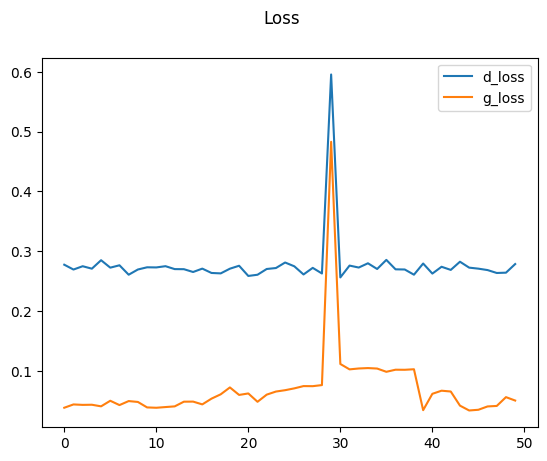

In [31]:
plt.suptitle('Loss')
plt.plot(hist.history['d_loss'], label='d_loss')
plt.plot(hist.history['g_loss'], label='g_loss')
plt.legend()
plt.show()

In [32]:
imgs=gen.predict(tf.random.normal((16,128,1)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


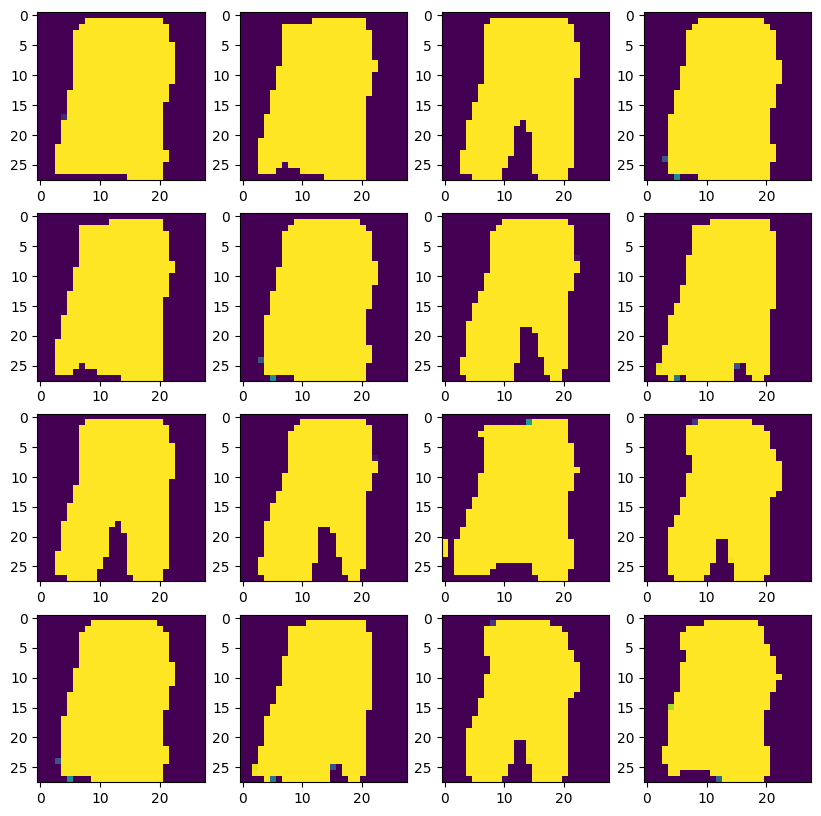

In [33]:
fig, ax = plt.subplots(ncols=4, nrows=4, figsize=(10,10))
for r in range(4): 
    for c in range(4): 
        ax[r][c].imshow(imgs[(r+1)*(c+1)-1])